# Verification converted EAM potential:

In [36]:
from tabulate import tabulate

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from scipy import constants as C

In [39]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (9,6) # the standard figure size

plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"]=1 

In [40]:
#key: tuple (from, to)

In [41]:
C.kilo*C.calorie/C.eV == U.kcal

True

In [42]:
C.eV

1.6021766208e-19

In [43]:
conversion = {}
#conversion[("kcal_per_mol", "eV_per_mol")] = U.kcal
conversion[("kcal_per_mol", "eV_per_mol")] = C.kilo*C.calorie/C.eV
conversion[("eV_per_mol", "eV")] = 1/C.Avogadro
conversion[("kcal_per_mol", "eV")] = \
    conversion[("kcal_per_mol", "eV_per_mol")] * conversion[("eV_per_mol", "eV")]    
conversion[("eV", "kcal_per_mol")] = 1/conversion[("kcal_per_mol", "eV")]

In [44]:
print( 
    tabulate( 
        [ [ k[0], k[1], v ] for k,v in conversion.items() ],
        headers = ("from","to","conversion factor"),
        tablefmt = "github") )

| from         | to           |   conversion factor |
|--------------|--------------|---------------------|
| kcal_per_mol | eV_per_mol   |         2.61145e+22 |
| eV_per_mol   | eV           |         1.66054e-24 |
| kcal_per_mol | eV           |         0.0433641   |
| eV           | kcal_per_mol |        23.0605      |


## Dimer energy with original eam potential

In [45]:
dat = np.loadtxt("units_metal/thermo.out",skiprows=1)

In [46]:
dist_in_Angstrom = 0.0001*dat[:,0]

In [47]:
etot_in_eV = dat[:,1]

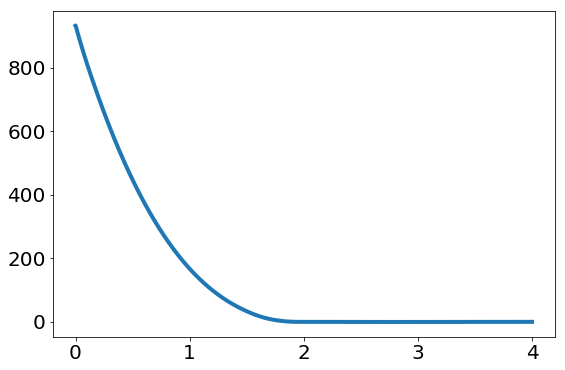

In [48]:
plt_metal = plt.plot(dist_in_Angstrom,etot_in_eV)

## Dimer energy with scipy-converted eam potential

In [49]:
dat = np.loadtxt("units_real/thermo.out",skiprows=1)

In [50]:
dist_in_Angstrom = 0.0001*dat[:,0]

In [51]:
etot_in_kcal_per_mole = dat[:,1]

Text(0, 0.5, '$E_{tot}\\ (\\mathrm{eV})$')

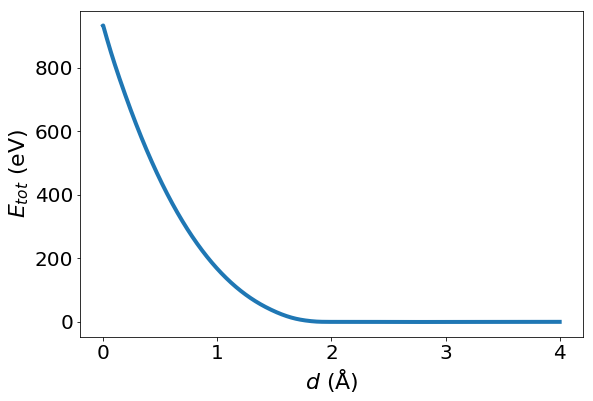

In [52]:
plt.plot(
    dist_in_Angstrom,etot_in_kcal_per_mole * conversion[("kcal_per_mol", "eV")])
plt.xlabel("$d\ (\mathrm{\AA})$")
plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

## Dimer energy with ASE-converted eam potential

In [53]:
dat = np.loadtxt("units_real_inexact/thermo.out",skiprows=1)

In [54]:
dist_in_Angstrom = 0.0001*dat[:,0]

In [55]:
etot_in_kcal_per_mole_ase = dat[:,1]

Text(0, 0.5, '$E_{tot}\\ (\\mathrm{eV})$')

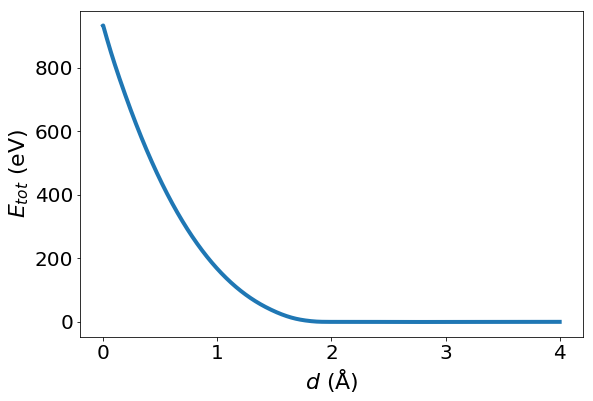

In [56]:
plt.plot(
    dist_in_Angstrom,etot_in_kcal_per_mole_ase * conversion[("kcal_per_mol", "eV")])
plt.xlabel("$d\ (\mathrm{\AA})$")
plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

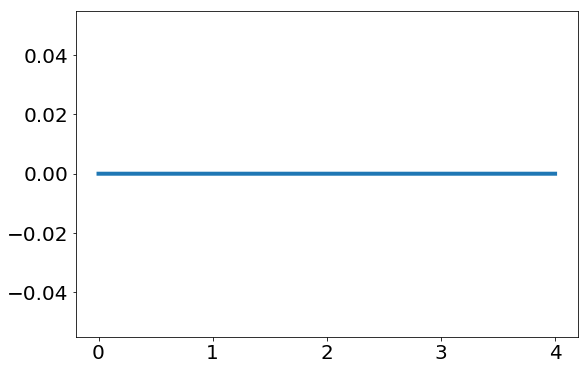

In [57]:
# no numeric difference in the two conversions
plt.plot(
    dist_in_Angstrom,
    etot_in_kcal_per_mole - etot_in_kcal_per_mole_ase )

In [58]:
np.max(np.abs((etot_in_kcal_per_mole - etot_in_kcal_per_mole_ase)[1:]))

0.0

## Dimer energy with artificially shifted eam potential

In [59]:
dat = np.loadtxt("units_metal_shifted/thermo.out",skiprows=1)

In [60]:
dist_in_Angstrom = 0.0001*dat[:,0]

In [61]:
etot_in_eV_shifted = dat[:,1]

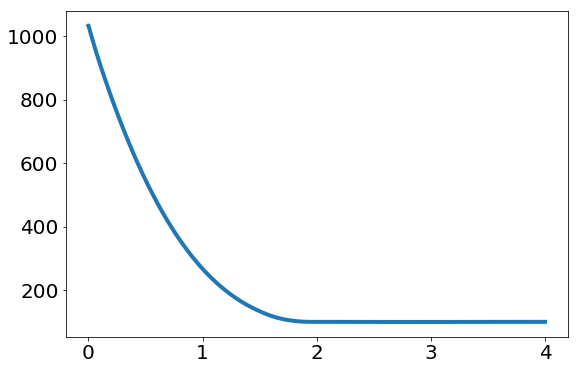

In [62]:
plt_metal_shifted = plt.plot(dist_in_Angstrom,etot_in_eV_shifted)

In [63]:
dat = np.loadtxt("units_real_shifted/thermo.out",skiprows=1)

In [64]:
dist_in_Angstrom = 0.0001*dat[:,0]

In [65]:
etot_in_kcal_per_mole_shifted = dat[:,1]

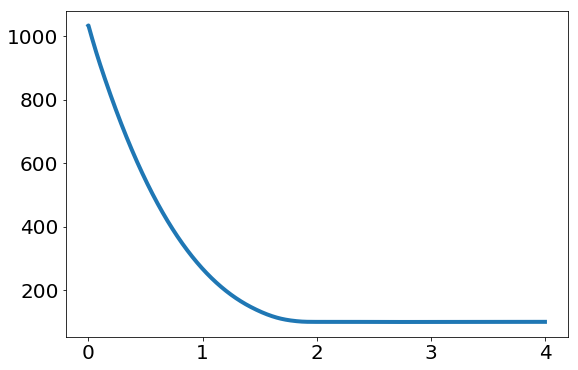

In [66]:
plt_real_shifted = plt.plot(dist_in_Angstrom,etot_in_kcal_per_mole_shifted * conversion[("kcal_per_mol", "eV")])

## sign change

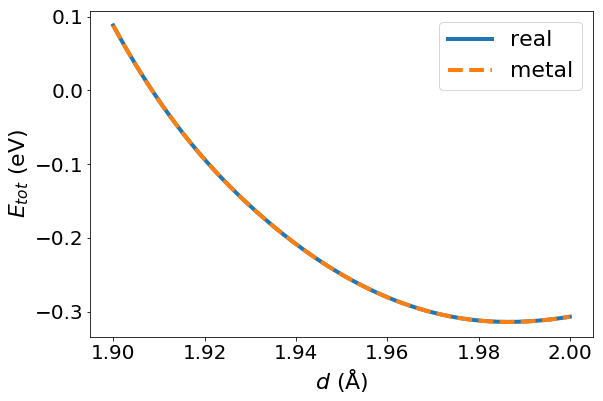

In [128]:
sel, = np.where(np.logical_and( dist_in_Angstrom > 1.90, dist_in_Angstrom < 2.0 ))
plt.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real')
plt.plot(
    dist_in_Angstrom[sel],
    etot_in_eV[sel],
    ls='--', label='metal')
plt.xlabel("$d\ (\mathrm{\AA})$")
plt.ylabel("$E_{tot}\ (\mathrm{eV})$")
plt.legend()

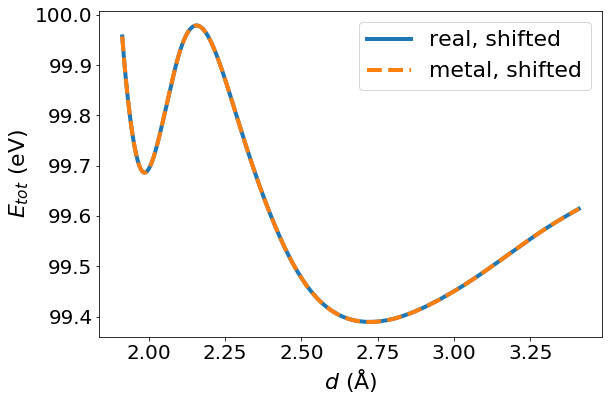

In [121]:
# artificaially shifted pair potential:
plt.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole_shifted[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real, shifted')
plt.plot(
    dist_in_Angstrom[sel],
    etot_in_eV_shifted[sel],
    ls='--', label='metal, shifted')
plt.xlabel("$d\ (\mathrm{\AA})$")
plt.ylabel("$E_{tot}\ (\mathrm{eV})$")
plt.legend()

## absolute error 
(converted back to metal units, against original potential)

In [69]:
absolute_error_in_eV = (
    etot_in_eV - etot_in_kcal_per_mole * conversion[("kcal_per_mol", "eV")])

In [70]:
absolute_error_in_eV_shifted = (
    etot_in_eV_shifted - etot_in_kcal_per_mole_shifted * conversion[("kcal_per_mol", "eV")])

Text(0, 0.5, '$\\Delta E\\ (\\mathrm{eV})$')

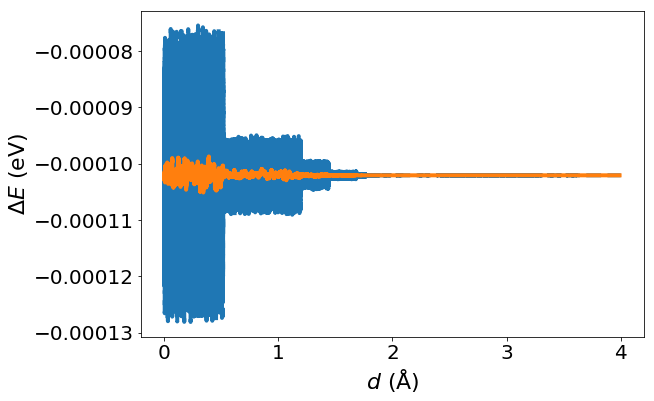

In [127]:
# absolute error
plt.plot(
    dist_in_Angstrom,
    absolute_error_in_eV, '--' )
N = 100
plt.plot(
    dist_in_Angstrom[:(1-N)],
    np.convolve(
        absolute_error_in_eV, np.ones((N,))/N,
        mode='valid') )
plt.xlabel("$d\ (\mathrm{\AA})$")
plt.ylabel("$\Delta E\ (\mathrm{eV})$")

Text(0, 0.5, '$\\Delta E\\ (\\mathrm{eV})$')

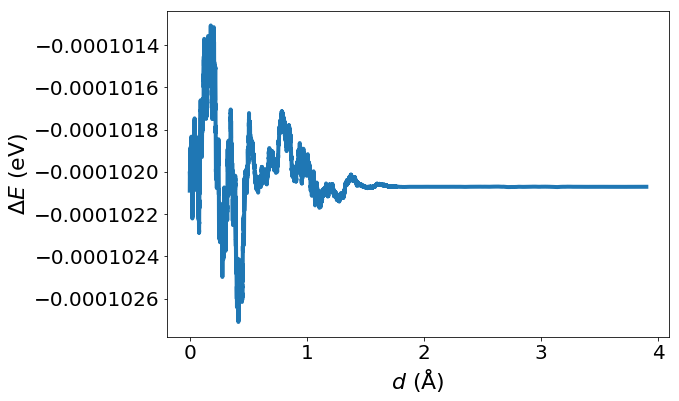

In [124]:
# absolute error smoothed by window of 1000 data points:
N = 1000
plt.plot(
    dist_in_Angstrom[:(1-N)],
    np.convolve(
        absolute_error_in_eV, np.ones((N,))/N,
        mode='valid') )
plt.xlabel("$d\ (\mathrm{\AA})$")
plt.ylabel("$\Delta E\ (\mathrm{eV})$")


In [73]:
sel, = np.where(np.logical_and( dist_in_Angstrom > 1.90, dist_in_Angstrom < 2.0 ))

In [74]:
np.max(absolute_error_in_eV[sel]) - np.min(absolute_error_in_eV[sel])

1.3353456174147738e-08

In [119]:
np.max(absolute_error_in_eV[sel])

-0.00010204454680290409

In [118]:
np.min(absolute_error_in_eV[sel])

-0.0001020970341766847

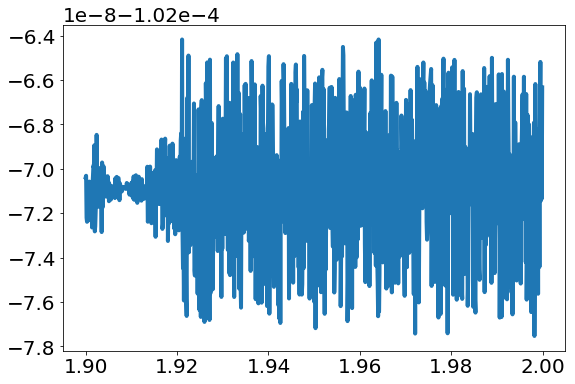

In [77]:
plt.plot(
    dist_in_Angstrom[sel],
    absolute_error_in_eV[sel],
    )

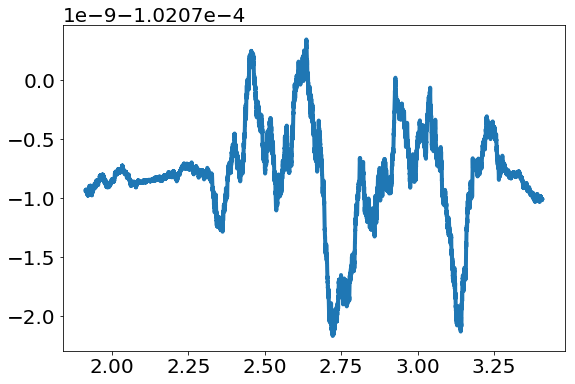

In [117]:
# tail of absolute error smoothed by window of 1000 data points:
N = 1000
plt.plot(
    dist_in_Angstrom[:(1-N)][sel],
    np.convolve(
        absolute_error_in_eV, np.ones((N,))/N,
        mode='valid')[sel] )

In [79]:
np.mean(absolute_error_in_eV[1:])

-0.00010204306783356176

In [80]:
# tail mean
np.mean(absolute_error_in_eV[sel])

-0.00010207087643785255

## absolute error of artificially shifted potential

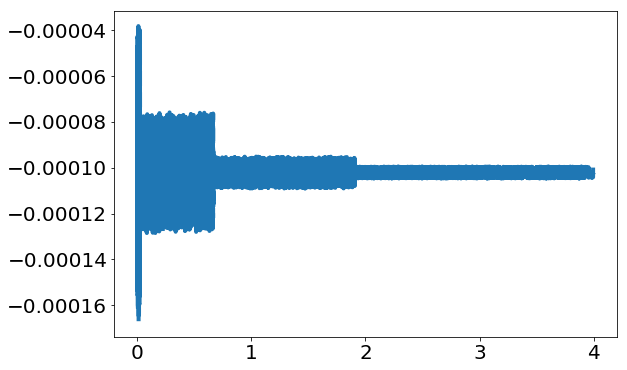

In [81]:
# error of artificially shifted potential
plt.plot(
    dist_in_Angstrom,
    absolute_error_in_eV_shifted, ls='--' )

Text(0, 0.5, '$\\Delta E\\ (\\mathrm{eV})$')

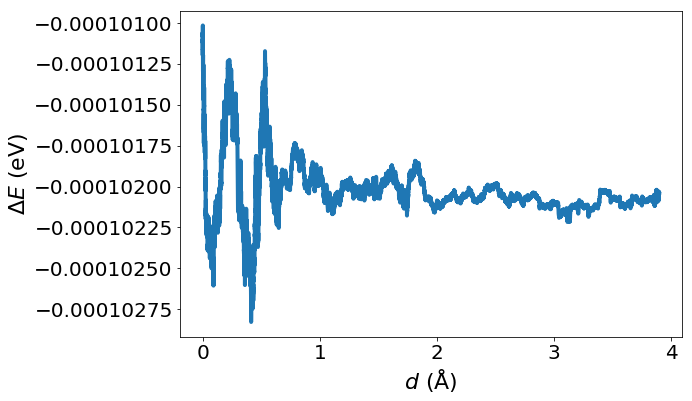

In [152]:
# absolute error smoothed by window of 1000 data points:
N = 1000
plt.plot(
    dist_in_Angstrom[:(1-N)],
    np.convolve(
        absolute_error_in_eV_shifted, np.ones((N,))/N,
        mode='valid') )
plt.xlabel("$d\ (\mathrm{\AA})$")
plt.ylabel("$\Delta E\ (\mathrm{eV})$")

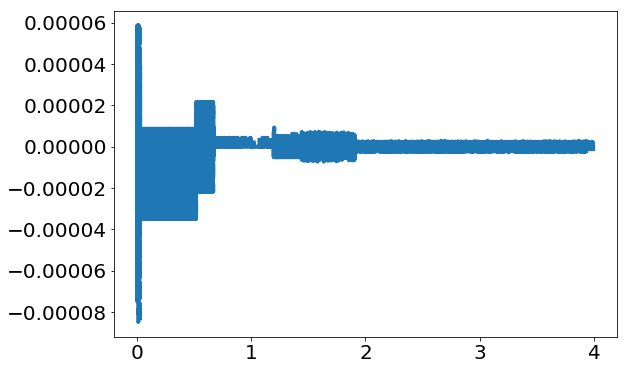

In [83]:
# difference in absolute errors
plt.plot(
    dist_in_Angstrom,
    absolute_error_in_eV-absolute_error_in_eV_shifted, ls='--' )

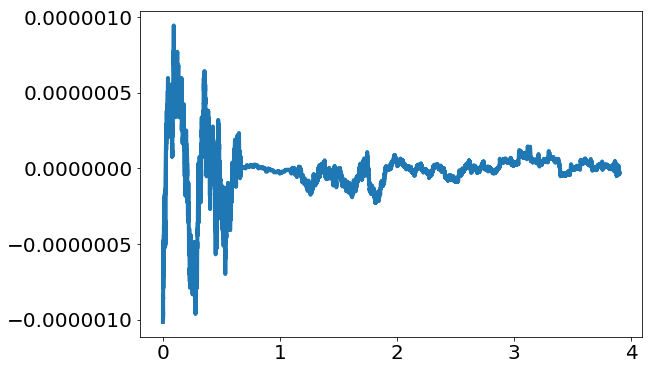

In [84]:
# difference in absolute error smoothed by window of 1000 data points:
N = 1000
plt.plot(
    dist_in_Angstrom[:(1-N)],
    np.convolve(
        absolute_error_in_eV-absolute_error_in_eV_shifted, np.ones((N,))/N,
        mode='valid') )


In [85]:
# tail no difference:

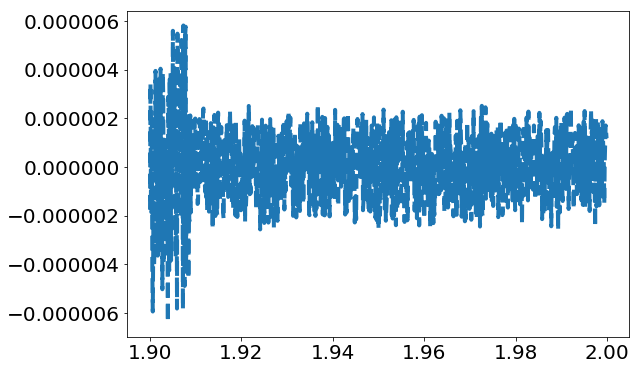

In [86]:
# tail of difference in absolute errors
plt.plot(
    dist_in_Angstrom[sel],
    (absolute_error_in_eV-absolute_error_in_eV_shifted)[sel], ls='--' )

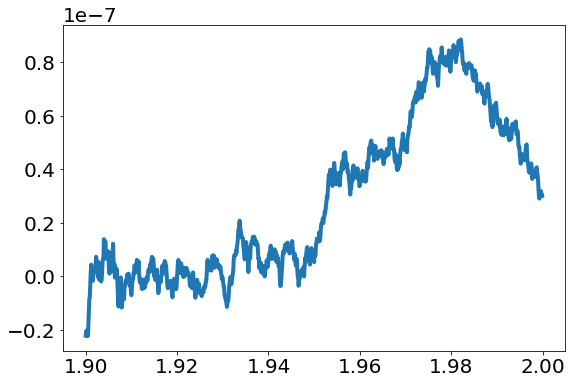

In [87]:
# tail of difference in absolute error smoothed by window of 1000 data points:
N = 1000
plt.plot(
    dist_in_Angstrom[:(1-N)][sel],
    np.convolve(
        absolute_error_in_eV-absolute_error_in_eV_shifted, np.ones((N,))/N,
        mode='valid')[sel] )

difference in absolute errors much smaller than error itself
=> systematic error in both converted systems

In [88]:
relative_error = absolute_error_in_eV / etot_in_eV

In [89]:
relative_error_shifted = absolute_error_in_eV_shifted / etot_in_eV_shifted

In [90]:
error_extrema = (
    np.min(relative_error[1:]), 
    np.max(relative_error[1:]) )

In [91]:
error_extrema_shifted = (
    np.min(relative_error_shifted[1:]), 
    np.max(relative_error_shifted[1:]))

In [92]:
error_extrema

(-0.15308195756651835, 0.38301425084551133)

In [93]:
error_extrema_shifted

(-1.0821217700251217e-06, -3.716811423870068e-08)

In [94]:
error_extrema_indices = (
    np.where( relative_error == error_extrema[1] )[0][0], 
    np.where( relative_error == error_extrema[0] )[0][0] )

In [95]:
error_extrema_indices_shifted = (
    np.where( relative_error_shifted == error_extrema_shifted[1] )[0][0], 
    np.where( relative_error_shifted == error_extrema_shifted[0] )[0][0] )

In [96]:
dist_in_Angstrom[error_extrema_indices[0]]

1.9085

In [97]:
dist_in_Angstrom[error_extrema_indices[1]]

1.9084

In [98]:
dist_in_Angstrom[error_extrema_indices_shifted[0]]

0.0099

In [99]:
dist_in_Angstrom[error_extrema_indices_shifted[1]]

1.8857000000000002

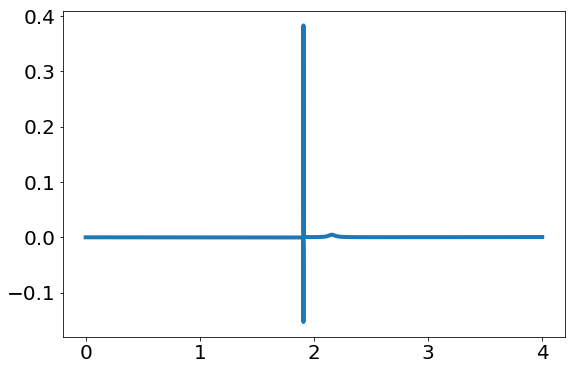

In [100]:
plt.plot(
    dist_in_Angstrom,
    relative_error )

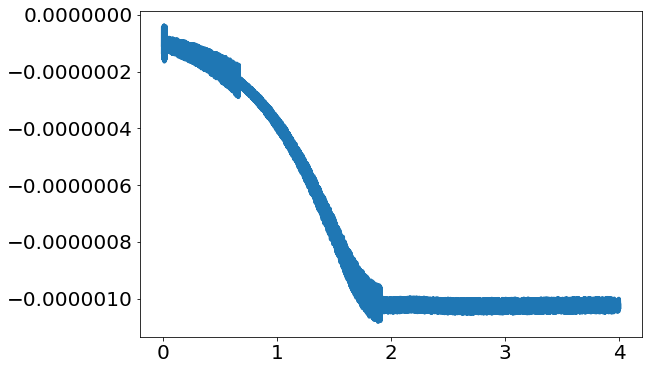

In [101]:
plt.plot(
    dist_in_Angstrom,
    relative_error_shifted )

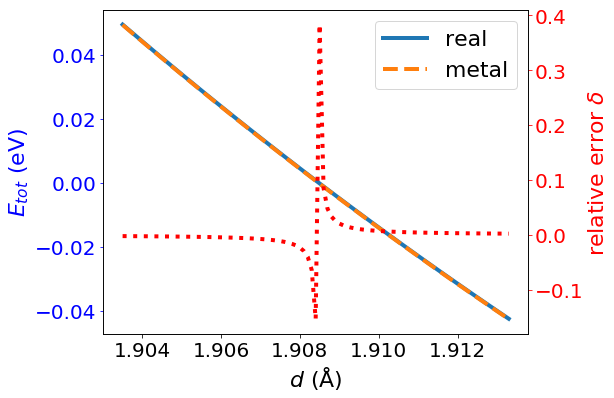

In [103]:
sel = range(error_extrema_indices[0]-50,error_extrema_indices[1]+50)


fig, ax1 = plt.subplots()

ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real')
ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_eV[sel],
    ls='--', label='metal')
ax1.set_xlabel("$d\ (\mathrm{\AA})$")
plt.legend()


# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel("$E_{tot}\ (\mathrm{eV})$", color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(
    dist_in_Angstrom[sel],
    relative_error[sel], 'r:', label='relative error' )
ax2.set_ylabel('relative error $\delta$', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
#plt.legend()
plt.show()


#plt.xlabel("$d\ (\mathrm{\AA})$")
#plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

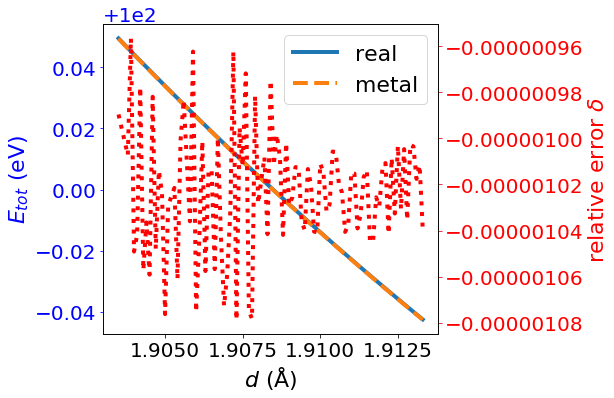

In [142]:
sel = range(error_extrema_indices[0]-50,error_extrema_indices[1]+50)


fig, ax1 = plt.subplots()

ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole_shifted[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real')
ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_eV_shifted[sel],
    ls='--', label='metal')
ax1.set_xlabel("$d\ (\mathrm{\AA})$")
plt.legend()


# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel("$E_{tot}\ (\mathrm{eV})$", color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(
    dist_in_Angstrom[sel],
    relative_error_shifted[sel], 'r:', label='relative error' )
ax2.set_ylabel('relative error $\delta$', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
#plt.legend()
plt.show()


#plt.xlabel("$d\ (\mathrm{\AA})$")
#plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

In [104]:
np.nanmean(relative_error)

0.00024391738513934976

In [105]:
np.nanstd(relative_error)

0.0022663642160612434

In [106]:
np.nanmean(np.abs(relative_error))

0.00028544990906992303

In [108]:
np.nanstd(np.abs(relative_error))

0.0022615085230942833

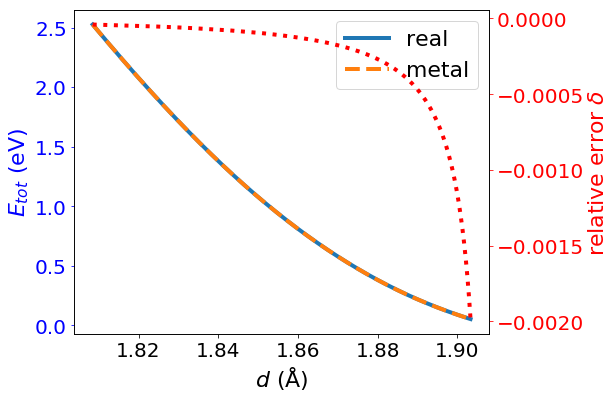

In [111]:
sel = sel = range(error_extrema_indices[0]-1000,error_extrema_indices[1]-50)


fig, ax1 = plt.subplots()

ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real')
ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_eV[sel],
    ls='--', label='metal')
ax1.set_xlabel("$d\ (\mathrm{\AA})$")
plt.legend()


# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel("$E_{tot}\ (\mathrm{eV})$", color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(
    dist_in_Angstrom[sel],
    relative_error[sel], 'r:', label='relative error' )
ax2.set_ylabel('relative error $\delta$', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
#plt.legend()
plt.show()


#plt.xlabel("$d\ (\mathrm{\AA})$")
#plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

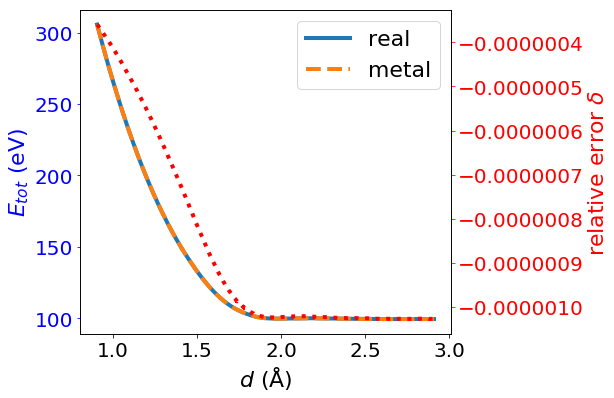

In [157]:
#sel = range(error_extrema_indices[0]-50,error_extrema_indices[1]+10000)
sel = range(error_extrema_indices[0]-10000,error_extrema_indices[1]+10000)


fig, ax1 = plt.subplots()

ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole_shifted[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real')
ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_eV_shifted[sel],
    ls='--', label='metal')
ax1.set_xlabel("$d\ (\mathrm{\AA})$")
plt.legend()


# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel("$E_{tot}\ (\mathrm{eV})$", color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
N = 1000
ax2.plot(
    dist_in_Angstrom[:(1-N)][sel],
    np.convolve(
        relative_error_shifted, np.ones((N,))/N,
        mode='valid')[sel],
    'r:', label='relative error' )
ax2.set_ylabel('relative error $\delta$', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
#plt.legend()
plt.show()


#plt.xlabel("$d\ (\mathrm{\AA})$")
#plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

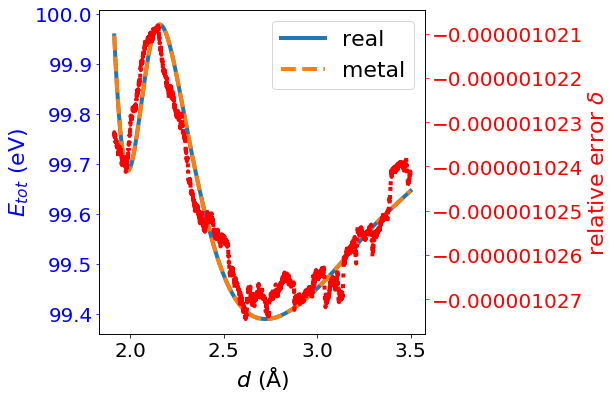

In [149]:
sel = range(error_extrema_indices[1]+50,35000)


fig, ax1 = plt.subplots()

ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole_shifted[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real')
ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_eV_shifted[sel],
    ls='--', label='metal')
ax1.set_xlabel("$d\ (\mathrm{\AA})$")
plt.legend()


# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel("$E_{tot}\ (\mathrm{eV})$", color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
N = 1000
ax2.plot(
    dist_in_Angstrom[:(1-N)][sel],
    np.convolve(
        relative_error_shifted, np.ones((N,))/N,
        mode='valid')[sel],
    'r:', label='relative error' )
ax2.set_ylabel('relative error $\delta$', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
#plt.legend()
plt.show()


#plt.xlabel("$d\ (\mathrm{\AA})$")
#plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

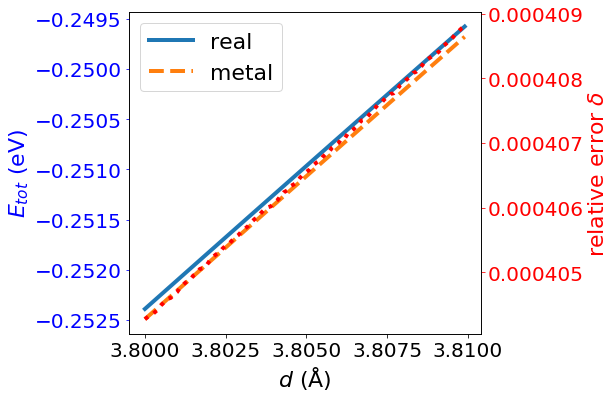

In [141]:
sel = sel = range(38000,38100)


fig, ax1 = plt.subplots()

ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_kcal_per_mole[sel] * conversion[("kcal_per_mol", "eV")],
    label = 'real')
ax1.plot(
    dist_in_Angstrom[sel],
    etot_in_eV[sel],
    ls='--', label='metal')
ax1.set_xlabel("$d\ (\mathrm{\AA})$")
plt.legend()


# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel("$E_{tot}\ (\mathrm{eV})$", color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(
    dist_in_Angstrom[sel],
    relative_error[sel], 'r:', label='relative error' )
ax2.set_ylabel('relative error $\delta$', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
#plt.legend()
plt.show()


#plt.xlabel("$d\ (\mathrm{\AA})$")
#plt.ylabel("$E_{tot}\ (\mathrm{eV})$")

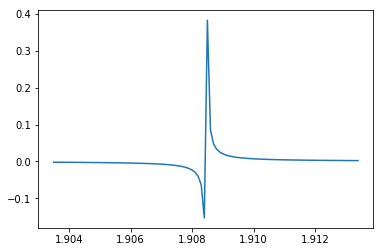

In [352]:
sel = range(maximum_error_index-50,maximum_error_index+50)

plt.plot(
    dist_in_Angstrom[sel],
    relative_error[sel] )

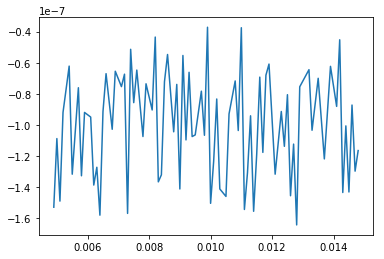

In [353]:
sel = range(
    error_extrema_indices_shifted[0]-50,
    error_extrema_indices_shifted[0]+50 )
plt.plot(
    dist_in_Angstrom[sel],
    relative_error_shifted[sel] )